## 离散值处理

In [1]:
import pandas as pd
import numpy as np
import warnings  # 忽略普通警告，不打印太多东西
warnings.filterwarnings('ignore')

In [2]:
vg_df = pd.read_csv('data/vgsales.csv', encoding='ISO-8859-1')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


机器无法识别字符串类型数据，需要做处理

In [3]:
genres = np.unique(vg_df['Genre'])
genres  # 不同的字符串并不多

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

## LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()  # 实例化
genre_labels = gle.fit_transform(vg_df['Genre'])  # 转换需要离散值的一列
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings  # 映射成数值

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [5]:
vg_df['GenreLabel'] = genre_labels  # 赋值到一列
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


## Map
自己建一个字典

In [6]:
gen_ord_map = {label:index  for index, label in enumerate(gle.classes_)}
gen_ord_map

{'Action': 0,
 'Adventure': 1,
 'Fighting': 2,
 'Misc': 3,
 'Platform': 4,
 'Puzzle': 5,
 'Racing': 6,
 'Role-Playing': 7,
 'Shooter': 8,
 'Simulation': 9,
 'Sports': 10,
 'Strategy': 11}

In [7]:
vg_df['GenreMap'] = vg_df['Genre'].map(gen_ord_map)
vg_df[['Name', 'Genre', 'GenreLabel', 'GenreMap']].iloc[1:7]  # 结果呈现我们设置的map

,Name,Genre,GenreLabel,GenreMap
1,Super Mario Bros.,Platform,4,4
2,Mario Kart Wii,Racing,6,6
3,Wii Sports Resort,Sports,10,10
4,Pokemon Red/Pokemon Blue,Role-Playing,7,7
5,Tetris,Puzzle,5,5
6,New Super Mario Bros.,Platform,4,4


## One-Hot Encoder
对于离散型特征，基于树的方法是不需要使用one-hot编码的，例如随机森林等。基于距离的模型，都是要使用one-hot编码，例如神经网络等。

In [8]:
from sklearn.preprocessing import OneHotEncoder
# 获取onehot后的结果，将字符串变成多列的0/1值，有则为1，无则为0
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(vg_df[['GenreLabel']]).toarray()
gen_feature_arr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
genres = np.unique(vg_df['Genre'])  # 获取全部不同的字符串
gen_features = pd.DataFrame(gen_feature_arr, columns=genres)  # 将字符串作为列，合并onehot数据
gen_features.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# 拿出两列原本的数据，实际场景中是全部数据合并，这里是为了查看方便
vg_df_2 = vg_df[['Name', 'Genre']]
vg_df_2.head()

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing


In [11]:
vg_df_ohe = pd.concat([vg_df_2,gen_features],axis=1)  # 两个数据合并
vg_df_ohe.head()  # 可以看到Platform列第二行为1，对应着Genre列第二行是Platform字符串

,Name,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Super Mario Bros.,Platform,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Racing,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Get Dummy
更加实用的onehot

In [12]:
gen_dummy_features = pd.get_dummies(vg_df['Genre'],drop_first=True)  # drop_first=True删掉全为0的列
dummy_df = pd.concat([vg_df[['Name', 'Genre']], gen_dummy_features], axis=1)
print(dummy_df.shape)
dummy_df.head()

(16598, 13)


,Name,Genre,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Sports,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,Platform,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Racing,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Sports,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,Role-Playing,0,0,0,0,0,0,1,0,0,0,0


可以看到两句话就解决了我们上面那一长串

In [13]:
gen_dummy_features = pd.get_dummies(vg_df['Genre'])  # 和上面相比少了drop_first=True，一般用这种
dummy_df_true = pd.concat([vg_df[['Name', 'Genre']], gen_dummy_features], axis=1)
print(dummy_df_true.shape)
dummy_df_true.head()

(16598, 14)


,Name,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,Sports,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,Platform,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Racing,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Sports,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,Role-Playing,0,0,0,0,0,0,0,1,0,0,0,0


## 二值特征化

In [14]:
vg_year_df = vg_df[['Name', 'Year']]
vg_year_df.head()

,Name,Year
0,Wii Sports,2006.0
1,Super Mario Bros.,1985.0
2,Mario Kart Wii,2008.0
3,Wii Sports Resort,2009.0
4,Pokemon Red/Pokemon Blue,1996.0


我们把2000年以上的归类为1，其它归类为0

In [15]:
vg_year_df['Year_tow'] = np.where(vg_year_df['Year'] >= 2000, 1, 0)
vg_year_df.head()

,Name,Year,Year_tow
0,Wii Sports,2006.0,1
1,Super Mario Bros.,1985.0,0
2,Mario Kart Wii,2008.0,1
3,Wii Sports Resort,2009.0,1
4,Pokemon Red/Pokemon Blue,1996.0,0


In [16]:
from sklearn.preprocessing import Binarizer
# sklearn中的方法
bn = Binarizer(threshold=2000)  # 大于2000我1，小于为0
vg_year_df['Year']=vg_year_df['Year'].fillna(0)  # 数据中有Nan值，需要补0，否则无法二分
bn_year = bn.transform([vg_year_df['Year']])[0]  # 获取转换的值，取第0列
vg_year_df['bn_year'] = bn_year  # 插入数据
vg_year_df.head()  # 结果与手动一致

,Name,Year,Year_tow,bn_year
0,Wii Sports,2006.0,1,1.0
1,Super Mario Bros.,1985.0,0,0.0
2,Mario Kart Wii,2008.0,1,1.0
3,Wii Sports Resort,2009.0,1,1.0
4,Pokemon Red/Pokemon Blue,1996.0,0,0.0


## 多项式特征
获得特征的更高维度和互相间关系的项。

In [17]:
polynomial_df = vg_df[['NA_Sales', 'EU_Sales']]
polynomial_df.head()

,NA_Sales,EU_Sales
0,41.49,29.02
1,29.08,3.58
2,15.85,12.88
3,15.75,11.01
4,11.27,8.89


In [18]:
from sklearn.preprocessing import PolynomialFeatures

# degree二次幂的复杂度
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(polynomial_df)
res

array([[4.1490000e+01, 2.9020000e+01, 1.7214201e+03, 1.2040398e+03,
        8.4216040e+02],
       [2.9080000e+01, 3.5800000e+00, 8.4564640e+02, 1.0410640e+02,
        1.2816400e+01],
       [1.5850000e+01, 1.2880000e+01, 2.5122250e+02, 2.0414800e+02,
        1.6589440e+02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e-02, 0.0000000e+00, 0.0000000e+00,
        1.0000000e-04],
       [1.0000000e-02, 0.0000000e+00, 1.0000000e-04, 0.0000000e+00,
        0.0000000e+00]])

以第一行为例：
<br>第一列和第二列分别表示原先的第一列和第二列
<br>第三列和第五列表示第一列和第二列分别的平方，第四列表示两者的乘积

In [19]:
intr_features = pd.DataFrame(res, columns=['NA_Sales',
                                           'EU_Sales',
                                           'NA_Sales^2',
                                           'NA_Sales*EU_Sales',
                                           'EU_Sales^2'])
intr_features.head()

,NA_Sales,EU_Sales,NA_Sales^2,NA_Sales*EU_Sales,EU_Sales^2
0,41.49,29.02,1721.4201,1204.0398,842.1604
1,29.08,3.58,845.6464,104.1064,12.8164
2,15.85,12.88,251.2225,204.1480,165.8944
3,15.75,11.01,248.0625,173.4075,121.2201
4,11.27,8.89,127.0129,100.1903,79.0321


In [20]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GenreLabel,GenreMap
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4,4
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,6,6
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,10,10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7,7


## Binning 特征
一般用来处理年龄

In [21]:
bin_df = vg_df[['Name','Year']]  # 假设GenreLabel是年龄
bin_df.head()

,Name,Year
0,Wii Sports,2006.0
1,Super Mario Bros.,1985.0
2,Mario Kart Wii,2008.0
3,Wii Sports Resort,2009.0
4,Pokemon Red/Pokemon Blue,1996.0


Text(0, 0.5, 'Frequency')

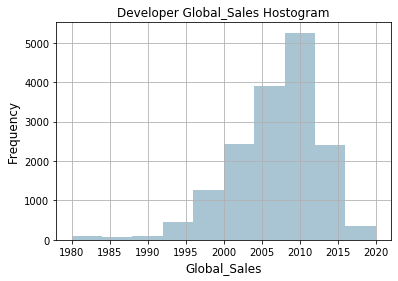

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats

fig, ax = plt.subplots()
bin_df['Year'].hist(color='#A9C5D3')
ax.set_title('Developer Global_Sales Hostogram', fontsize=12)
ax.set_xlabel('Global_Sales', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

这样区间就出来了，我们可以分成多个区间，如1980-1985是一个区间，1986-1990是一个区间

In [23]:
gle = LabelEncoder()  # 实例化
bin_df['Year_bin'] = pd.cut(bin_df['Year'], 9)  # 切分成9组，也可以自己指定切分区间
bin_df['Year_bin'] = bin_df['Year_bin'].astype(str)  # 转换类型为字符串
bin_year = gle.fit_transform(bin_df['Year_bin'])  # 利用LabelEncoder方法变成1-9的数值
bin_df['Year_bin'] = bin_year  # 赋值到新的列
bin_df.head(10)

,Name,Year,Year_bin
0,Wii Sports,2006.0,5
1,Super Mario Bros.,1985.0,1
2,Mario Kart Wii,2008.0,6
3,Wii Sports Resort,2009.0,6
4,Pokemon Red/Pokemon Blue,1996.0,3
5,Tetris,1989.0,2
6,New Super Mario Bros.,2006.0,5
7,Wii Play,2006.0,5
8,New Super Mario Bros. Wii,2009.0,6
9,Duck Hunt,1984.0,0


## 对数变换

经常有这样的假设：数据的分布是正态分布。如线性回归的时候误差项要满足正态分布，而当数据不满足的时候，则需要把数据变换成正态分布

In [37]:
df_log = vg_df[['Name','NA_Sales']] 
df_log['NA_Sales_log'] = np.log((1+df_log['NA_Sales']))
df_log.head()

,Name,NA_Sales,NA_Sales_log
0,Wii Sports,41.49,3.749269
1,Super Mario Bros.,29.08,3.403860
2,Mario Kart Wii,15.85,2.824351
3,Wii Sports Resort,15.75,2.818398
4,Pokemon Red/Pokemon Blue,11.27,2.507157


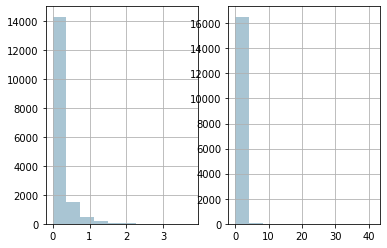

In [45]:
# 画两张对比图，左边log过的更偏态
fig, ax = plt.subplots()
plt.subplot(121) 
df_log['NA_Sales_log'].hist(color='#A9C5D3')

plt.subplot(122) 
df_log['NA_Sales'].hist(color='#A9C5D3')

上面是手动的，还有模块化的BoxCox，这里暂不做示例

## 日期相关特征
将时间特征转换成可以应用的数据

In [46]:
import datetime
from dateutil.parser import parse
import pytz

In [55]:
time_stamps = ['2020-12-16 10:30:00.360000+00:00','2019-04-16 12:15:00.250000+00:00',
              '2018-10-16 08:30:00.750000+00:00','2019-01-16 23:30:00.255500+00:00']

df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2020-12-16 10:30:00.360000+00:00
1,2019-04-16 12:15:00.250000+00:00
2,2018-10-16 08:30:00.750000+00:00
3,2019-01-16 23:30:00.255500+00:00


In [56]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2020-12-16 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2019-04-16 12:15:00.250000+0000', tz='UTC'),
       Timestamp('2018-10-16 08:30:00.750000+0000', tz='UTC'),
       Timestamp('2019-01-16 23:30:00.255500+0000', tz='UTC')],
      dtype=object)

In [59]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
df['WeekDayName'] = df['TS_obj'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

df[['Time','Year','Month','day','DayOfWeek','WeekDayName','DayOfYear','WeekOfYear','Quarter']]

,Time,Year,Month,day,DayOfWeek,WeekDayName,DayOfYear,WeekOfYear,Quarter
0,2020-12-16 10:30:00.360000+00:00,2020,12,16,2,Wednesday,351,51,4
1,2019-04-16 12:15:00.250000+00:00,2019,4,16,1,Tuesday,106,16,2
2,2018-10-16 08:30:00.750000+00:00,2018,10,16,1,Tuesday,289,42,4
3,2019-01-16 23:30:00.255500+00:00,2019,1,16,2,Wednesday,16,3,1


这样就能从时间数据中获取很多数据，不同场景对不同数据有需求，如外卖则会关注周末和季节等。

In [60]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['Microsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)
df['Utcoffset'] = df['TS_obj'].apply(lambda d: d.utcoffset())  # UTC时间位移

df[['Time','Hour','Minute','Second','Microsecond','Utcoffset']]

,Time,Hour,Minute,Second,Microsecond,Utcoffset
0,2020-12-16 10:30:00.360000+00:00,10,30,0,360000,0 days
1,2019-04-16 12:15:00.250000+00:00,12,15,0,250000,0 days
2,2018-10-16 08:30:00.750000+00:00,8,30,0,750000,0 days
3,2019-01-16 23:30:00.255500+00:00,23,30,0,255500,0 days


又比如按早晚切分时间

In [61]:
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'],bins=hour_bins,labels=bin_names)

df[['Time','Hour','TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2020-12-16 10:30:00.360000+00:00,10,Morning
1,2019-04-16 12:15:00.250000+00:00,12,Afternoon
2,2018-10-16 08:30:00.750000+00:00,8,Morning
3,2019-01-16 23:30:00.255500+00:00,23,Night
